This script is to answer the question:
 - If close depends on previous day's close?

To answer the question, the first step is to do scailing, otherwise we cannot answer if current price is high or low.

A stock price is combined with stock's inherient value and emotional waves. the inherient value is 
Vt = Vt-1 * (1+Pd)

Vt - the inherient value at day t.
Vt-1 - the inherient value at day t-1
Pd - the average daily profit. 

since the nature of a stock is exponential, we apply a natual log on the price.
then make a linear regression.:-)

we will check 3 stocks: AZN, Apple and Hexagon.


In [1]:
import pandas as pd
import numpy as np
STOCK_NAME='apple'
STOCK_ID=16100307

In [165]:
df = pd.read_json('../findGlide/' + STOCK_NAME + '.json')

In [166]:
df.tail()

,high,last,low,open,time,volume
2509,161.02,160.55,156.5328,157.65,1637280000000,117305597
2510,165.70,161.02,161.0000,161.68,1637539200000,117467889
2511,161.80,161.41,159.0601,161.12,1637625600000,96041899
2512,162.14,161.94,159.6400,160.75,1637712000000,69463623
2513,160.45,156.81,156.3600,156.81,1637960400000,0


In [167]:
df['last_log']=np.log(df['last'])

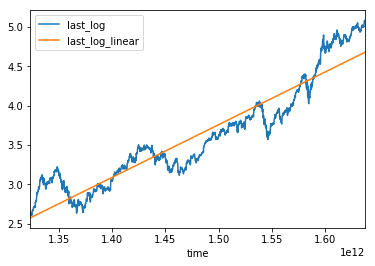

In [194]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = df['time'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df['last_log'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
df['last_log_linear']=Y_pred
df['last_log_error']=df['last_log']-df['last_log_linear']

df.plot(x='time', y=['last_log','last_log_linear'])

In [195]:
scope = (Y_pred[-1]-Y_pred[0])/X.shape[0]
print(scope)

[0.00083748]


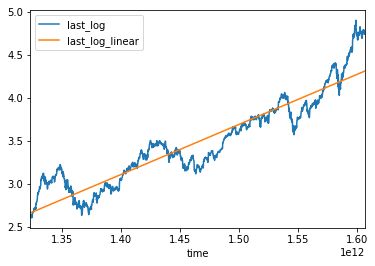

In [191]:
X = df['time'].values[:-250].reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df['last_log'].values[:-250].reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
df2 = pd.DataFrame({'time':X.reshape(-1), 
                    'last_log_linear':Y_pred.reshape(-1), 
                    'last_log':Y.reshape(-1)})




df2.plot(x='time', y=['last_log','last_log_linear'])

In [192]:
scope = (Y_pred[-1]-Y_pred[0])/X.shape[0]
print(scope)

[0.00072784]


In [169]:
X.shape

(2514, 1)

In [170]:
scope = (Y_pred[-1]-Y_pred[0])/X.shape[0]
print(scope)

[0.00083748]


In [171]:
linear_regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

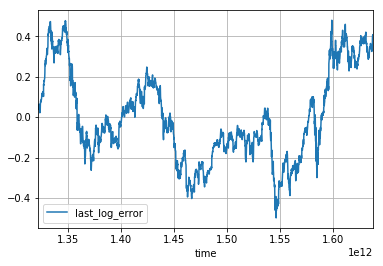

In [172]:
df.plot(x='time', y=['last_log_error'],grid=True)

In [173]:
df.head()

,high,last,low,open,time,volume,last_log,last_log_linear,last_log_error
0,13.6527,13.6500,13.5107,13.6079,1322611200000,14502386,2.613740,2.575187,0.038552
1,13.8929,13.8546,13.5982,13.6589,1322697600000,13827834,2.628617,2.575764,0.052853
2,14.0582,13.9179,13.8779,13.9286,1322784000000,13545470,2.633176,2.576341,0.056835
3,14.1575,14.0361,13.9424,14.0457,1323043200000,12763161,2.641633,2.578071,0.063561
4,14.0939,13.9625,13.9064,14.0193,1323129600000,10135859,2.636375,2.578648,0.057727


In [174]:
df.head()

,high,last,low,open,time,volume,last_log,last_log_linear,last_log_error
0,13.6527,13.6500,13.5107,13.6079,1322611200000,14502386,2.613740,2.575187,0.038552
1,13.8929,13.8546,13.5982,13.6589,1322697600000,13827834,2.628617,2.575764,0.052853
2,14.0582,13.9179,13.8779,13.9286,1322784000000,13545470,2.633176,2.576341,0.056835
3,14.1575,14.0361,13.9424,14.0457,1323043200000,12763161,2.641633,2.578071,0.063561
4,14.0939,13.9625,13.9064,14.0193,1323129600000,10135859,2.636375,2.578648,0.057727


In [175]:
df['last_log_diff']=df['last_log'].diff()
df['last_log_diff_shift']=df['last_log_diff'].shift(-1)
df2=df[['last_log_error','last_log_diff_shift']]

df2.corr()

,last_log_error,last_log_diff_shift
last_log_error,1.000000,-0.033064
last_log_diff_shift,-0.033064,1.000000


In [176]:
df['last_log_diff_shift'].mean()

0.0009714665180111306

In [177]:
df['last_log_diff_shift'].std()

0.0178500726236642

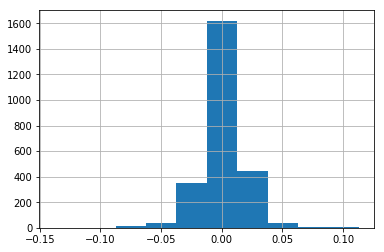

In [178]:
df['last_log_diff_shift'].hist()


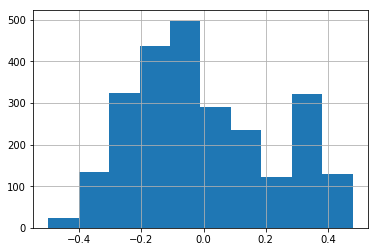

In [179]:
df['last_log_error'].hist()

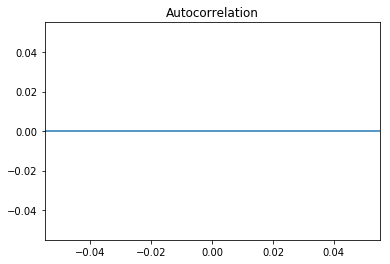

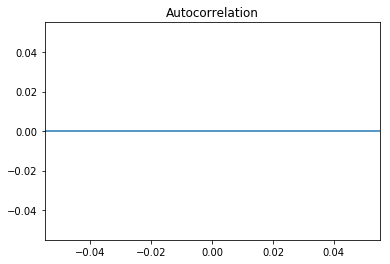

In [107]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

data = df[['time', 'last_log_diff']].set_index(['time'])
plot_acf(data)

In [108]:
df['last_log_diff'].autocorr()

-0.1524198971936997